## Name : Pranav Narkhede

### Assignment Week-9

### Problem Statement
Anomaly Detection==>
The Challenge is Anomaly Detection which generates alerts on client's business metrics.


### Dataset Description

-timestamp [ float ] : is provided as a Unix epoch in seconds.

-value [ int ] : is a real value measurement of some metric at the timestamp.

-is_anomaly [ boolean ] : is a boolean value which is True if the corresponding value is identified as an anomaly.

-predicted [ float ] : is a real value prediction coming from a black box forecasting model for that timestamp. This black box forecasting model is assumed to be aware of only the true data distribution.

## Import Libraries


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


## 1. Data Loading and Cleaning


In [87]:
file_path = 'anomaly-detection/train.csv'
df= pd.read_csv(file_path)

In [88]:
# Copying our Data for Later Use
df_copy = df.copy(deep=True)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [90]:
df.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [91]:
df.shape

(15830, 4)

In [92]:
df.dtypes

timestamp       int64
value           int64
is_anomaly       bool
predicted     float64
dtype: object

In [93]:
# Check Duplicate Data 

print(df[df.duplicated()])


Empty DataFrame
Columns: [timestamp, value, is_anomaly, predicted]
Index: []


No duplicates


In [94]:
# Check for missing values
print(df.isnull().sum())

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64


No Null Values

In [95]:
df.head()


,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [96]:
#Determine the number of anomalous transactions in the dataset

print("Total No of Transactions:",len(df))

Fraud = df[df['is_anomaly']==True]
print("No of Anomalous Transactions:",len(Fraud))

Valid = df[df['is_anomaly']==False]
print("No of Valid Transactions:",len(Valid))

outlier_fraction = len(Fraud)/float(len(df))
valid_fraction = len(Valid)/float(len(df))
print("Percentage of Anomalous Transactions:",round((outlier_fraction*100),3))
print("Percentage of Valid Transactions:",round((valid_fraction*100),3))

Total No of Transactions: 15830
No of Anomalous Transactions: 776
No of Valid Transactions: 15054
Percentage of Anomalous Transactions: 4.902
Percentage of Valid Transactions: 95.098


## Data Transformation

We can convert the data or keep the same

A Unix epoch timestamp represents the number of seconds that have elapsed since January 1, 1970, at 00:00:00 UTC, also known as the Unix Epoch [4]. It's a standardized way to represent a specific point in time as a single integer, making it easy to store and calculate time differences across different systems and time zones .

 ### For example, the timestamp 1425008573 corresponds to Friday, 27 February 2015 3:42:53 AM

In [97]:
# Convert type of timestamp to datetime to extract details
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


In [98]:
print(df['timestamp'].dtype)



datetime64[ns]


The .dt accessor provides a convenient way to extract various components of datetime objects (like hour, day, month, year) or perform datetime-related operations [4].

In [99]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year


In [100]:
# Display the transformed data
print(df.head())

            timestamp  value  is_anomaly  predicted  hour  day  month  year
0 2015-02-27 03:42:53     42       False  44.072500     3   27      2  2015
1 2015-02-27 03:47:53     41       False  50.709390     3   27      2  2015
2 2015-02-27 03:52:53     41       False  81.405120     3   27      2  2015
3 2015-02-27 03:57:53     61       False  39.950367     3   27      2  2015
4 2015-02-27 04:02:53     44       False  35.350160     4   27      2  2015


In [101]:
## Label Encoding
le = LabelEncoder()

# Fit and transform the 'is_anomaly' column
df['is_anomaly'] = le.fit_transform(df['is_anomaly'])
df_copy['is_anomaly'] = le.fit_transform(df['is_anomaly'])

In [102]:
df.head()

,timestamp,value,is_anomaly,predicted,hour,day,month,year
0,2015-02-27 03:42:53,42,0,44.072500,3,27,2,2015
1,2015-02-27 03:47:53,41,0,50.709390,3,27,2,2015
2,2015-02-27 03:52:53,41,0,81.405120,3,27,2,2015
3,2015-02-27 03:57:53,61,0,39.950367,3,27,2,2015
4,2015-02-27 04:02:53,44,0,35.350160,4,27,2,2015


##  Data Visulization

C:\Users\Pranav\AppData\Local\Temp\ipykernel_15804\269350704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_anomaly', data=df, palette='Set2')


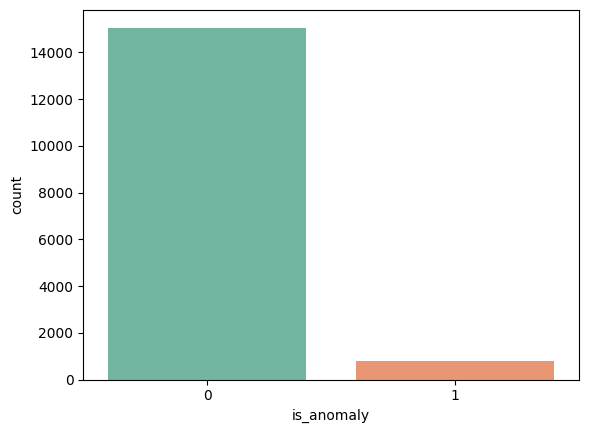

In [103]:
sns.countplot(x='is_anomaly', data=df, palette='Set2')
plt.show()

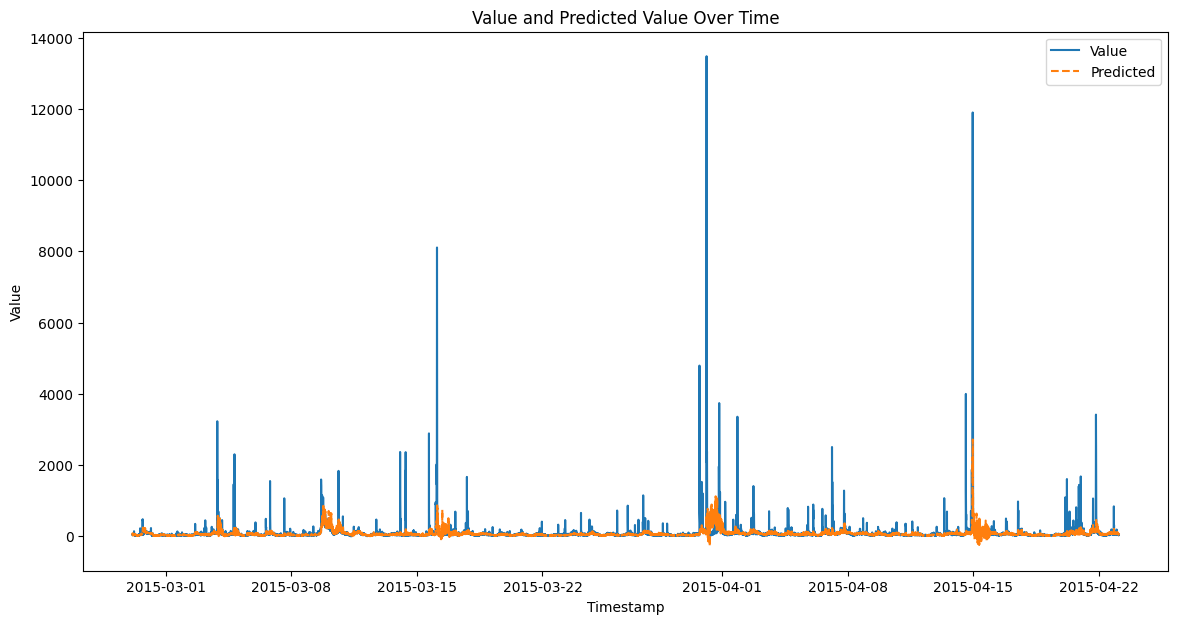

In [104]:
import matplotlib.pyplot as plt

# Plot the value over time
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.plot(df['timestamp'], df['predicted'], label='Predicted', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Value and Predicted Value Over Time')
plt.legend()
plt.show()


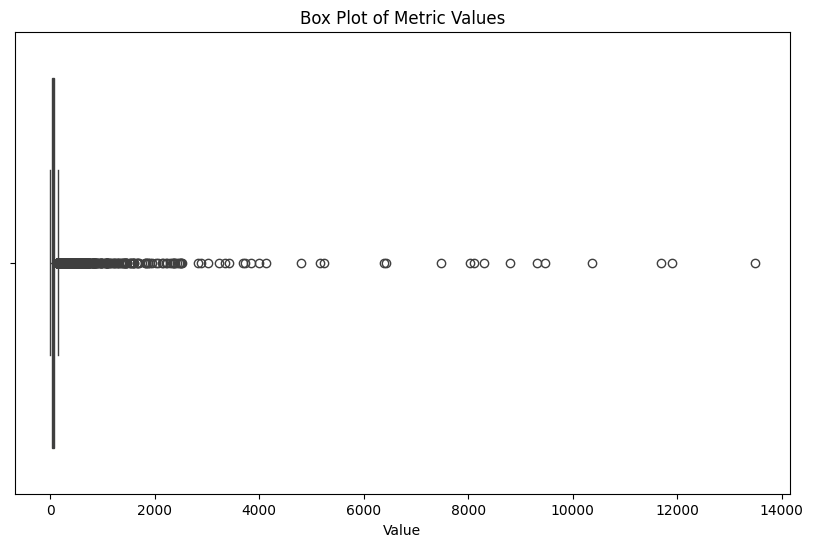

In [105]:
# Box plot of the metric values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value'])
plt.title('Box Plot of Metric Values')
plt.xlabel('Value')
plt.show()


<Axes: >

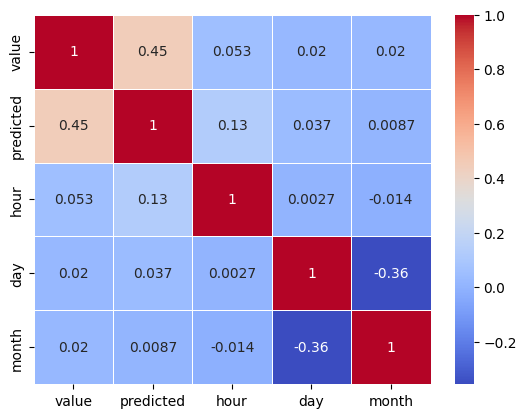

In [106]:
# Correlation heatmap

correlation_matrix = df[['value', 'predicted', 'hour', 'day', 'month']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)



In [107]:
## I am going to use the Original Timestamp for model training 

In [108]:
df_copy.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,0,44.072500
1,1425008873,41,0,50.709390
2,1425009173,41,0,81.405120
3,1425009473,61,0,39.950367
4,1425009773,44,0,35.350160


In [148]:
X=df_copy[['timestamp', 'value','predicted']]

Y=df_copy['is_anomaly']



In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you want to scale 'value' and 'predicted' columns
columns_to_scale = ['value', 'predicted']

scaler = StandardScaler()
X.loc[:, columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [150]:
X.head()

,timestamp,value,predicted
0,1425008573,-0.135422,-0.300692
1,1425008873,-0.138530,-0.228901
2,1425009173,-0.138530,0.103133
3,1425009473,-0.076370,-0.345280
4,1425009773,-0.129206,-0.395041


In [151]:
X.shape

(15830, 3)

In [152]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_anomaly, dtype: int64

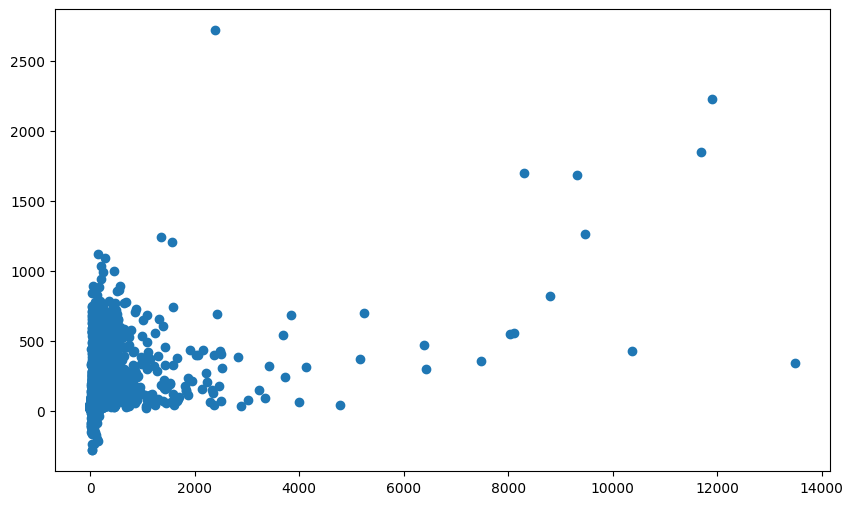

In [153]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['value'], df['predicted'])


In [154]:
z=np.where(df_copy['value']<1500)
len(z[0])

15766

##  Anomaly Detection Algorithms

Multiple anomaly detection algorithms to identify anomalies in the data. Here, we use four different algorithms for demonstration: Isolation Forest, Local Outlier Factor and DBSCAN.

### Isolation Forest


In [161]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(X)



In [162]:
anomalies

array([ 1,  1, -1, ...,  1, -1,  1])

The value 1 indicates normal data point and -1 indicate the outlier point

## Indexs of All the Anomaly Point

In [163]:
index=np.where(anomalies < 0)
index

(array([    2,    22,    25, ..., 15823, 15826, 15828], dtype=int64),)

In [164]:
num_anomalies = len(index[0])
print(f"Number of anomalies: {num_anomalies}")

Number of anomalies: 1583


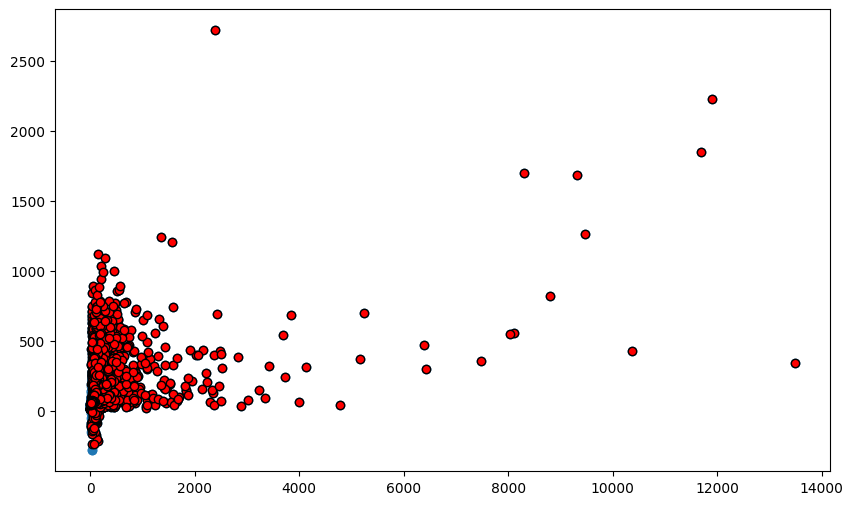

In [165]:

plt.figure(figsize=(10, 6))
plt.scatter(df_copy['value'], df_copy['predicted'], label='Normal Data')

# Highlight anomalies in red
plt.scatter(df_copy.iloc[index]['value'], df.iloc[index]['predicted'], color='red', edgecolor='black', label='Anomalies')


## Local Outlier Factor

In [166]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=2, contamination=0.2) # Adjust n_neighbors and contamination as needed
y_pred = lof.fit_predict(X)

In [167]:
y_pred

array([-1, -1,  1, ...,  1, -1, -1])

In [168]:
index2=np.where(y_pred < 1 )
index2


(array([    0,     1,     4, ..., 15822, 15828, 15829], dtype=int64),)

In [142]:
len(index2[0])

3166

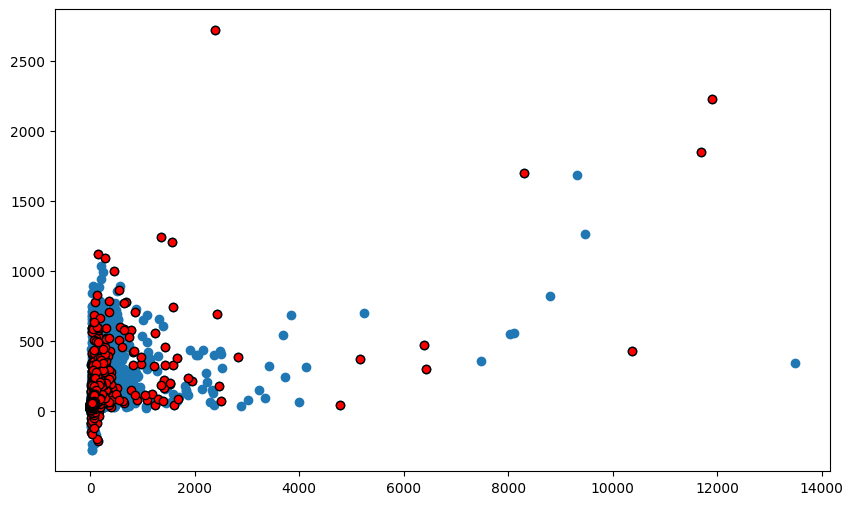

In [125]:

plt.figure(figsize=(10, 6))
plt.scatter(df['value'], df['predicted'], label='Normal Data')

# Highlight anomalies in red
plt.scatter(df_.iloc[index2]['value'], df.iloc[index2]['predicted'], color='red', edgecolor='black', label='Anomalies')


## DBSCAN

In [126]:
from sklearn.cluster import DBSCAN
#from sklearn.dataset import make_circles

In [127]:
# Prepare features for DBSCAN
X=df[['value', 'predicted','day','month','year','hour']]

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=5, min_samples=2) # Adjust eps and min_samples as needed
y_pred = dbscan.fit_predict(X)

In [128]:
y_pred

array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64)

-Points labeled as -1 are anomalies.


-Points labeled with 0, 1, 2, etc., are part of clusters and are not anomalies.

In [129]:
index3=np.where(y_pred < 0)
index3

(array([    2,    18,    22, ..., 15806, 15812, 15822], dtype=int64),)

In [130]:
len(index3[0])

2350

In [131]:
y_test_pred = dbscan.fit_predict(df_test)


In [132]:
y_test_pred

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

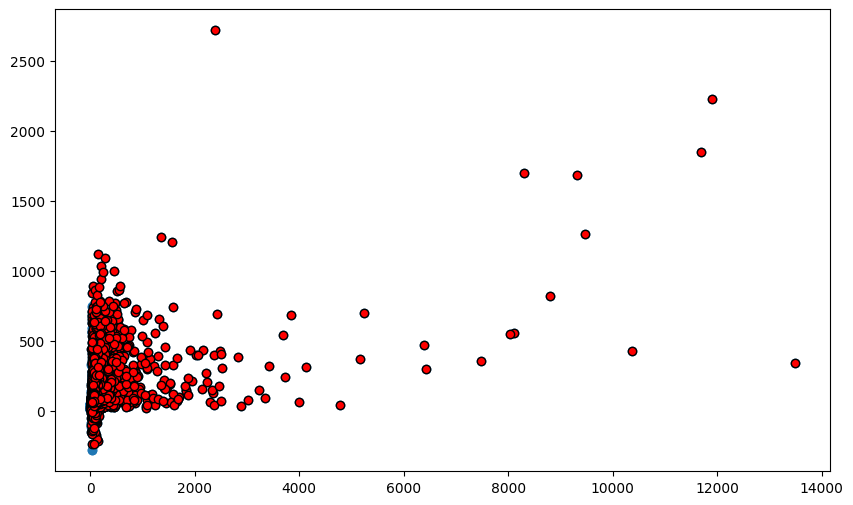

In [133]:

plt.figure(figsize=(10, 6))
plt.scatter(df['value'], df['predicted'], label='Normal Data')

# Highlight anomalies in red
plt.scatter(df.iloc[index3]['value'], df.iloc[index3]['predicted'], color='red', edgecolor='black', label='Anomalies')


Points are very close so it hides all the blue points while showing anomaly points